In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [3]:
# Add the latitudes and longitudes to a list. Unzip the lat_lngs
coordinates = list(lat_lngs)
print(coordinates)

[(-21.929173137068545, -100.7553939364298), (70.34961459159578, -175.45631826103613), (-62.56663725345231, -174.136511517), (-30.138642665388545, -20.615334954406535), (-83.59114742939835, 112.3403127764318), (0.06629260383157032, 40.40598874389511), (-3.713199443256599, -107.22417953325707), (-51.33887104950526, -160.74215237308374), (33.75643066778379, -65.50800491861065), (47.920576690025314, 147.4011734794098), (-69.1222365136856, 172.11224402224707), (3.3790572413163176, 159.7785758112501), (-86.83196627322567, -47.652202336441945), (-40.004153787741764, -38.93006339697959), (75.68049792964186, -37.91429520220507), (19.610579173214177, 25.757237246335166), (84.7335316321261, 139.7945258582123), (24.990381460534806, -10.986656691835265), (-88.38558138183599, 103.4959189485163), (-76.5173144245351, 126.97042699309998), (-54.36355329748004, 65.5275377854623), (-72.29384834555589, 163.46753627587992), (-54.47870727929837, -129.43875799474262), (-78.10489742088237, -65.96510464949013),

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

622

In [21]:
cities

['puerto ayora',
 'mys shmidta',
 'vaini',
 'jamestown',
 'albany',
 'garissa',
 'avarua',
 'saint george',
 'vostok',
 'bluff',
 'namatanai',
 'ushuaia',
 'cidreira',
 'tasiilaq',
 'kutum',
 'nizhneyansk',
 'puerto del rosario',
 'new norfolk',
 'saint-philippe',
 'rikitea',
 'kulhudhuffushi',
 'north bend',
 'georgetown',
 'dikson',
 'hualmay',
 'talnakh',
 'upernavik',
 'phalombe',
 'salou',
 'bredasdorp',
 'atuona',
 'yialos',
 'nikolskoye',
 'durban',
 'hofn',
 'hithadhoo',
 'acapulco',
 'busselton',
 'san alberto',
 'truro',
 'soloneshnoye',
 'rancho palos verdes',
 'gurlan',
 'vao',
 'saskylakh',
 'punta arenas',
 'inongo',
 'mataura',
 'barrow',
 'koutiala',
 'turukhansk',
 'norman wells',
 'carnarvon',
 'lavrentiya',
 'tautira',
 'nueve de julio',
 'kelo',
 'darhan',
 'rawannawi',
 'port alfred',
 'hilo',
 'qaanaaq',
 'bethel',
 'agadez',
 'norfolk',
 'isangel',
 'kapaa',
 'kushmurun',
 'faya',
 'yinchuan',
 'meyungs',
 'guangyuan',
 'polunochnoye',
 'attawapiskat',
 'butarita

In [22]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [23]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=026a43e4fd2b7d6063a8fd638bd71a30


In [24]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
    
# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")



Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto ayora
Processing Record 2 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 3 of Set 1 | vaini
Processing Record 4 of Set 1 | jamestown
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | garissa
Processing Record 7 of Set 1 | avarua
Processing Record 8 of Set 1 | saint george
Processing Record 9 of Set 1 | vostok
Processing Record 10 of Set 1 | bluff
Processing Record 11 of Set 1 | namatanai
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | cidreira
Processing Record 14 of Set 1 | tasiilaq
Processing Record 15 of Set 1 | kutum
Processing Record 16 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 17 of Set 1 | puerto del rosario
Processing Record 18 of Set 1 | new norfolk
Processing Record 19 of Set 1 | saint-philippe
Processing Record 20 of Set 1 | rikitea
Processing Record 21 of Set 1 | kulhudhuffushi
Processin

Processing Record 41 of Set 4 | fort frances
Processing Record 42 of Set 4 | coruripe
Processing Record 43 of Set 4 | sitka
Processing Record 44 of Set 4 | illoqqortoormiut
City not found. Skipping...
Processing Record 45 of Set 4 | luderitz
Processing Record 46 of Set 4 | mitu
Processing Record 47 of Set 4 | sovetskiy
Processing Record 48 of Set 4 | christchurch
Processing Record 49 of Set 4 | saleaula
City not found. Skipping...
Processing Record 50 of Set 4 | vanavara
Processing Record 1 of Set 5 | katherine
Processing Record 2 of Set 5 | cap-aux-meules
Processing Record 3 of Set 5 | klaksvik
Processing Record 4 of Set 5 | cayenne
Processing Record 5 of Set 5 | valle de allende
Processing Record 6 of Set 5 | martinsville
Processing Record 7 of Set 5 | marzuq
Processing Record 8 of Set 5 | fukue
Processing Record 9 of Set 5 | vardo
Processing Record 10 of Set 5 | dingle
Processing Record 11 of Set 5 | port moresby
Processing Record 12 of Set 5 | kaohsiung
Processing Record 13 of Set 

Processing Record 32 of Set 8 | cherskiy
Processing Record 33 of Set 8 | meulaboh
Processing Record 34 of Set 8 | fairhope
Processing Record 35 of Set 8 | salalah
Processing Record 36 of Set 8 | kontagora
Processing Record 37 of Set 8 | sao joao da barra
Processing Record 38 of Set 8 | bonthe
Processing Record 39 of Set 8 | prince rupert
Processing Record 40 of Set 8 | mezen
Processing Record 41 of Set 8 | mehamn
Processing Record 42 of Set 8 | raudeberg
Processing Record 43 of Set 8 | tura
Processing Record 44 of Set 8 | shimoda
Processing Record 45 of Set 8 | bunia
Processing Record 46 of Set 8 | sarvar
Processing Record 47 of Set 8 | hovd
Processing Record 48 of Set 8 | kyra
Processing Record 49 of Set 8 | mahebourg
Processing Record 50 of Set 8 | vila velha
Processing Record 1 of Set 9 | jackson
Processing Record 2 of Set 9 | beisfjord
Processing Record 3 of Set 9 | alice springs
Processing Record 4 of Set 9 | ostrovnoy
Processing Record 5 of Set 9 | vestbygda
City not found. Skipp

Processing Record 18 of Set 12 | zarasai
Processing Record 19 of Set 12 | houma
Processing Record 20 of Set 12 | qurayyat
Processing Record 21 of Set 12 | moerai
Processing Record 22 of Set 12 | sabha
Processing Record 23 of Set 12 | road town
Processing Record 24 of Set 12 | the valley
Processing Record 25 of Set 12 | nizhniy tsasuchey
Processing Record 26 of Set 12 | norsup
Processing Record 27 of Set 12 | sibolga
Processing Record 28 of Set 12 | krasnyy chikoy
Processing Record 29 of Set 12 | otane
Processing Record 30 of Set 12 | chitral
Processing Record 31 of Set 12 | massakory
Processing Record 32 of Set 12 | maragogi
Processing Record 33 of Set 12 | anqiu
Processing Record 34 of Set 12 | los llanos de aridane
Processing Record 35 of Set 12 | eureka
Processing Record 36 of Set 12 | pandan
Processing Record 37 of Set 12 | san quintin
Processing Record 38 of Set 12 | camacha
Processing Record 39 of Set 12 | haibowan
City not found. Skipping...
Processing Record 40 of Set 12 | pada

In [25]:
len(city_data)

574

In [26]:
# Create a DataFrame of City Weather Data
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Puerto Ayora,-0.74,-90.35,77.00,94,15,4.70,EC,2020-05-05 11:54:19
1,Vaini,-21.20,-175.20,71.60,94,20,7.72,TO,2020-05-05 11:54:20
2,Jamestown,42.10,-79.24,30.20,80,1,5.82,US,2020-05-05 11:51:33
3,Albany,42.60,-73.97,39.99,48,9,4.00,US,2020-05-05 11:50:03
4,Garissa,-0.45,39.64,92.05,46,83,17.47,KE,2020-05-05 11:54:20
5,Avarua,-21.21,-159.78,69.80,100,5,2.24,CK,2020-05-05 11:54:20
6,Saint George,37.10,-113.58,55.40,26,1,5.82,US,2020-05-05 11:54:21
7,Vostok,46.49,135.88,37.35,82,97,4.68,RU,2020-05-05 11:54:21
8,Bluff,-46.60,168.33,46.44,88,92,18.32,NZ,2020-05-05 11:54:21
9,Namatanai,-3.67,152.43,80.28,77,71,7.58,PG,2020-05-05 11:54:21


In [28]:
# Reorder the columns of DataFrame
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Puerto Ayora,EC,2020-05-05 11:54:19,-0.74,-90.35,77.00,94,15,4.70
1,Vaini,TO,2020-05-05 11:54:20,-21.20,-175.20,71.60,94,20,7.72
2,Jamestown,US,2020-05-05 11:51:33,42.10,-79.24,30.20,80,1,5.82
3,Albany,US,2020-05-05 11:50:03,42.60,-73.97,39.99,48,9,4.00
4,Garissa,KE,2020-05-05 11:54:20,-0.45,39.64,92.05,46,83,17.47
5,Avarua,CK,2020-05-05 11:54:20,-21.21,-159.78,69.80,100,5,2.24
6,Saint George,US,2020-05-05 11:54:21,37.10,-113.58,55.40,26,1,5.82
7,Vostok,RU,2020-05-05 11:54:21,46.49,135.88,37.35,82,97,4.68
8,Bluff,NZ,2020-05-05 11:54:21,-46.60,168.33,46.44,88,92,18.32
9,Namatanai,PG,2020-05-05 11:54:21,-3.67,152.43,80.28,77,71,7.58


In [29]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [30]:
# Plot Latitude vs. Temperature.  Get data for plotting.
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [32]:
# Import the time module.
import time

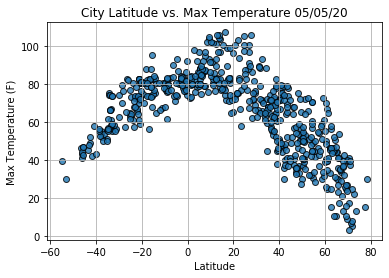

In [33]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

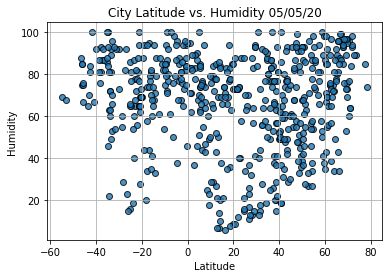

In [34]:
# Plot Latitude vs. Humidity
# Build the scatter plot for latitude vs. Humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

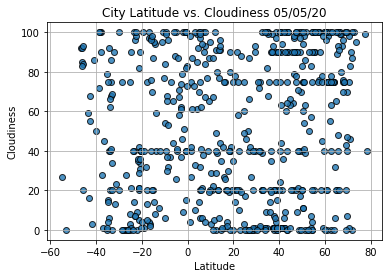

In [36]:
# Plot Latitude vs. Cloudiness
# Build the scatter plot for latitude vs. Cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

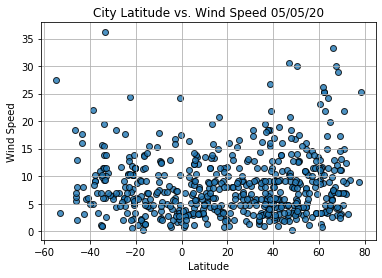

In [37]:
# Plot Latitude vs. Wind Speed
# Build the scatter plot for latitude vs. Wind Speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()